In [127]:
import numpy as np
import commands

In [128]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [216]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from 'cat_utils.py'>

In [130]:
# LOAD IR CATALOGS OVER 10deg FOV centered at (RA,Dec)=(0,-27deg)

raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
labels = '02a57694o0326I 02a57694o0368I 02a57694o0323I 02a57694o0365I'.split()
ir_cats = [cat_utils.IRCatalog(raw_frames_path,l,\
                             orthofitsimagepath=analysis_root+'/'+l+'/'+l+'_5degframecentered.fits') for l in labels]

loading 02a57694o0326I
identifying and excluding artifacts (ie, saturated pixels)
loading 02a57694o0368I
identifying and excluding artifacts (ie, saturated pixels)
loading 02a57694o0323I
identifying and excluding artifacts (ie, saturated pixels)
loading 02a57694o0365I
identifying and excluding artifacts (ie, saturated pixels)


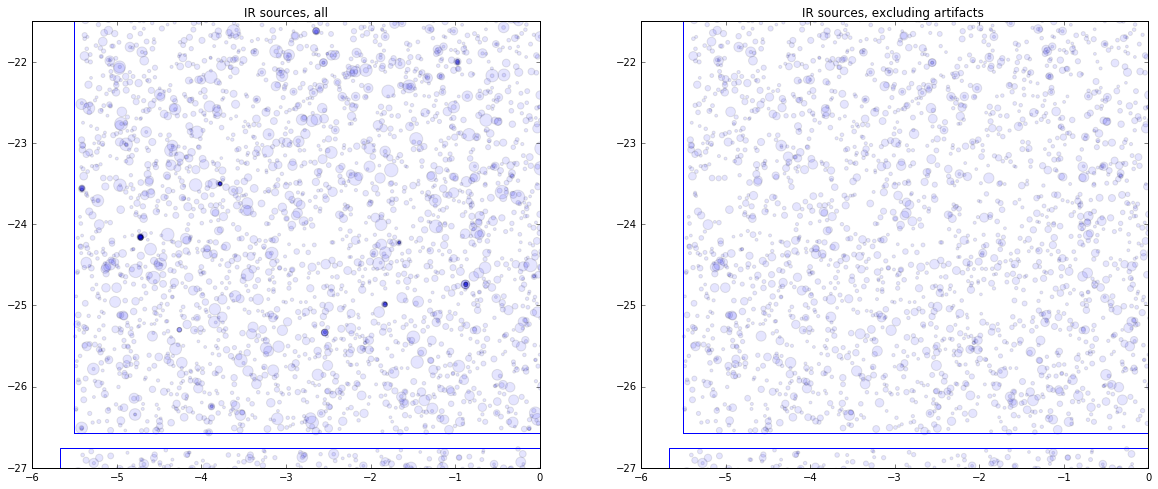

In [133]:
plt.figure(figsize=(20,8))

plt.subplot(121)
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=False)
plt.ylim([-27,-21.5])
plt.xlim([-6,0])
plt.title('IR sources, all')

plt.subplot(122)
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=True)
plt.ylim([-27,-21.5])
plt.xlim([-6,0])
plt.title('IR sources, excluding artifacts ')

(-34, -20)

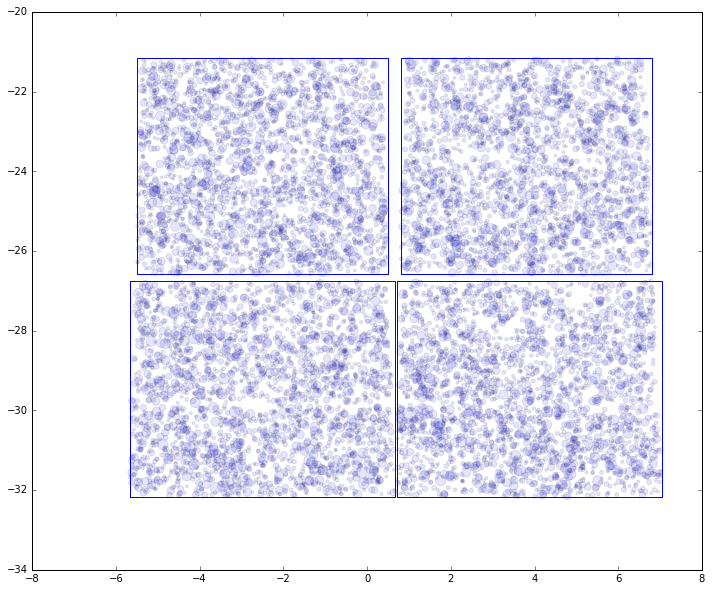

In [136]:
plt.figure(figsize=(12,10))
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4)
plt.xlim([-8,8])
plt.ylim([-34,-20])

In [137]:
# LOAD MWA CATALOG

mwa_cat = cat_utils.MWACatalog('mwa_calibration_source_list.sav')

In [138]:
mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[0])

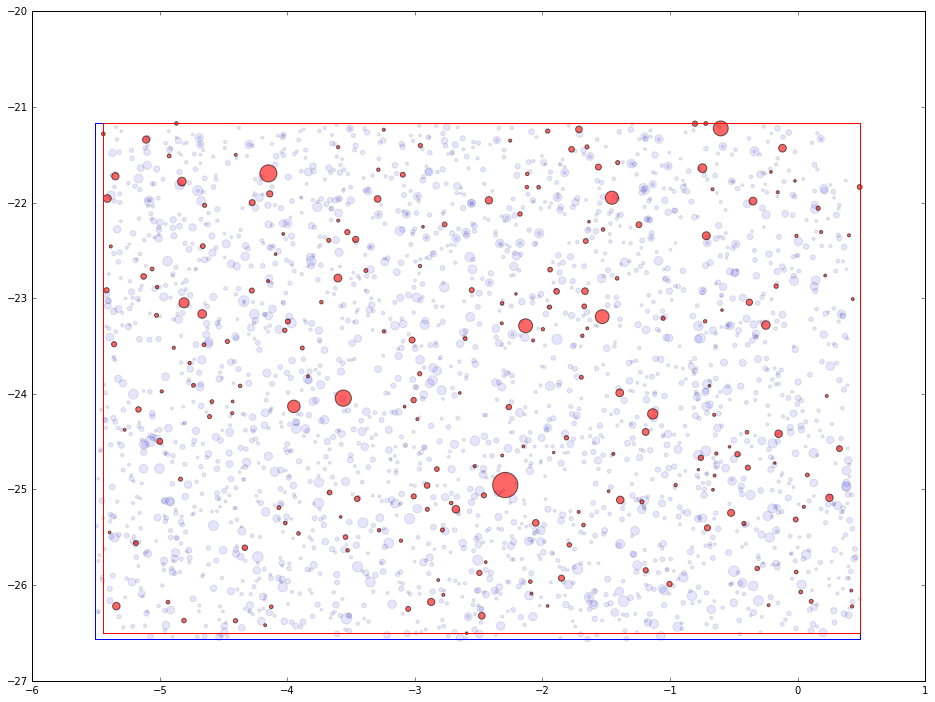

In [139]:
plt.figure(figsize=(16,12))
cat_utils.plot_cat_list(plt,[ir_cats[0],mwa_cat_ir0],[500,60],['b','r'],jymin_vals=[.015,0],alpha_vals=[.1,.6])
# plt.xlim([-8,8])
# plt.ylim([-34,-20])

In [217]:
dtheta = 5./60 # 5arcmin
ir_img = cat_utils.cat2img(ir_cats[0],bound_cat=ir_cats[0],dtheta=dtheta)
mwa_img = cat_utils.cat2img(mwa_cat_ir0,bound_cat=ir_cats[0],dtheta=dtheta)

64
64


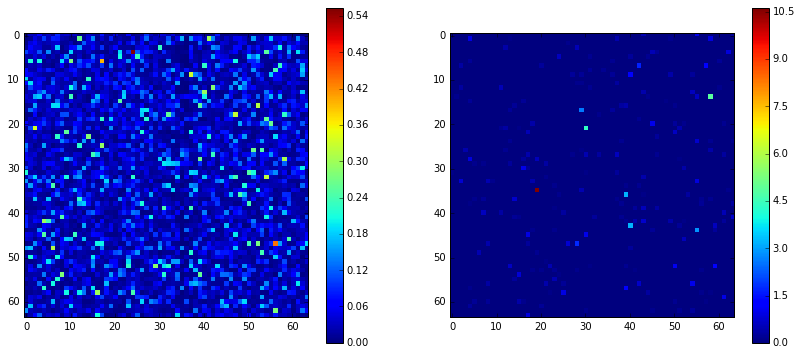

In [219]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.imshow(ir_img,interpolation='nearest')
plt.colorbar()

plt.subplot(122)
plt.imshow(mwa_img,interpolation='nearest')
plt.colorbar()